**Machine Learning For Marketing - 2023 Group H**<br>
**Project 1 - Regression**


---


Group Members: Félix Funes (20220306), Alisson Puente (20221156), Bernardo Graça (20220217), Nuno Rosa (20220287)

## Abstract

Through the past 30 years the digital transformation of music and the emergence of new digital channels (social networks, streaming platforms, and distribution platforms) made the music industry highly competitive and a dynamic market. Actually, it’s considered as an economic driver that provides job and social cohesion, influence too in other areas such tourism, hospitality and media. The annual revenue of the global recorded music industry is $25.9 billion as of 2021.

The music industry generates a lot of wealth and public exposure for stakeholders (musicians, managers, and distributors). Due to the financial return and the digital data access of the songs, it generated the search for a recipe to create a Hit or the likelihood of a song. The popularity of songs can make or break the success of record artists and companies and by knowing this can help record companies to promote and manage advertisement of their music more effectively. However, predicting the popularity of songs is not an easy task as it depends on many factors such as genre, tempo, lyrics, audience preferences, etc. Moreover, the popularity of songs can change over time due to trends and events.

Therefore, the record company needs a data-driven approach to estimate the popularity of songs based on their features and use this information to plan their promotion strategies and budgets. This project aims to build a regression model that can predict the popularity score of a song based on its features using data mining techniques.







# **Business Understanding**

### Business Goals

The business goal of this project is to develop a model that can predict the popularity of songs based on their characteristics, such as genre, rhythm, lyrics, and others, based on the values provided by the initial database, and that allows constant learning and updating through the inclusion of new songs in the dataset. 

The predicted popularity will be used by the record company's marketing department to allocate promotion budgets for each song.

* Increase revenue by identifying the key features that are mostly strongly associated with song populatirity, promoting music that are more likely to generate revenue.
* Improve user engagement by tailoring music recommendations to individual users based on their preferences and predicting the popularity songs. 


###  Data mining goals:

 Identify key features that drive popularity and use this information to guide decision-making.

* Mean Absolute Error (MAE) - The model should have a low MAE, indicating that the predicted sales estimates are close to the actual sales values.

*   Root Mean Squared Error (RMSE) - Calculated by taking the square root of the average of the squared differences between the predicted and actual values.

*   R-squared (R²) - It measures the proportion of variance in the dependent variable that is explained by the independent variables.

*  Mean Absolute Percentage Error (MAPE %) - It measures the percentage difference between the predicted values and the actual values for each data point in the dataset.

*   MAX Error - Calculated by maximum absolute difference between the predicted and actual values in a dataset.

### Sucess criteria :

* The R^2 score should have a score of minimum 0,7 

* The max error, should be lower than 20 and the residuals should be similar between the 2 sets

* The model should have high accuracy and reliability in predicting songs popularity scores;

* The model should be able to handle different types of songs and features;

* The model should learn and adjust if new songs are added;

* The model should be interpretable and data-driven to stakeholders budget allocation.


### Project plan :

Firstly we are going to perfom data preparation and undersatinding on our dataset provided. 
We try to adopt such data mining techniques and develop 4 different regression models, test them and select the best performing predictive model.
 
 The plan for this project is to follow these steps:
1.   Data understanding - By exploring and describing the variables and structure of the dataset.

2.   Data preparation - Cleaning and transforming the data for better results on de modelling stage.

3. Modeling: Selecting the appropriate techniques and develop models using different algorithms, parameters, and validation methods.

4. Evaluation: Analysing how well models are aligned with success criteria and business objectives.

5. Deployment: Implement the final model into the operational environment, monitor its performance over time, and report the results and outcomes to the stakeholders.


### Current situation and available resources

The record company has a large collection of information on songs, with various characteristics and popularity scores. And so they aim to transform the information into business data-driven to help the decision-making process. 
 
- This dataset has features of each song.
- Dependent variable is the Popularity Score - with measure scale between 0 and 100.

The available resources for this project are:
- A team of data scientists with expertise in data mining and machine learning
- A database server with sufficient storage and processing power
- A software platform with tools for data analysis and modeling

The stakeholders involved on project are:
- The marketing department: As the main customers of this project who will use the model outputs to plan the budget assign to promote each song. They will also provide feedback on the model's performance and usability.

- The data scientists: As the persons responsible for designing, developing, testing, and deploying the model. They will also communicate with other stakeholders and document their work.

- The artists: As creators of the songs who will benefit from increased exposure and sales if their songs are promoted effectively. They will also provide new inputs for features of the model.

The scope of this project is limited to predicting popularity scores based on song features. It does not include other aspects such as market segmentation, customer preferences, or competitor analysis.

## Data Loading - Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import math
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
!pip install optuna
import optuna
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from yellowbrick.regressor import ResidualsPlot
from scipy import stats
from scipy.stats import boxcox

#to plot in notebook
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 5.2 MB/s eta 0:00:00


## Import Dataset


In [ ]:
# Load data as ds
ds = pd.read_excel('https://github.com/felix-funes/machine-learning-for-marketing/blob/main/songs_popularity.xlsx?raw=true', engine = 'openpyxl')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   originality       5742 non-null   float64
 5   danceability      18835 non-null  float64
 6   energy            18835 non-null  float64
 7   instrumentalness  18829 non-null  float64
 8   key               18835 non-null  int64  
 9   liveness          18835 non-null  float64
 10  loudness          18835 non-null  float64
 11  audio_mode        18835 non-null  int64  
 12  speechiness       18835 non-null  float64
 13  tempo             18835 non-null  float64
 14  time_signature    18835 non-null  int64  
 15  audio_valence     18835 non-null  float64
dtypes: float64(10), int64(5), object(1)
memo

#Data Understanding

In [ ]:
ds.head(12)

,song_name,song_popularity,song_duration_ms,acousticness,originality,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,NaN,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,NaN,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,NaN,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,NaN,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,NaN,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
5,Bring Me To Life,80,235893,0.008950,NaN,0.316,0.945,0.000002,4,0.3960,-3.169,0,0.1240,189.931,4,0.320
6,Last Resort,81,199893,0.000504,NaN,0.581,0.887,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.724
7,Are You Gonna Be My Girl,76,213800,0.001480,NaN,0.613,0.953,0.000582,2,0.1520,-3.435,1,0.0855,105.046,4,0.537
8,Mr. Brightside,80,222586,0.001080,NaN,0.330,0.936,0.000000,1,0.0926,-3.660,1,0.0917,148.112,4,0.234
9,Sex on Fire,81,203346,0.001720,NaN,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374


In [ ]:
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
song_name,18835,13070,Better,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
song_popularity,18835.0,NaN,NaN,NaN,52.991877,21.905654,0.0,40.0,56.0,69.0,100.0
song_duration_ms,18835.0,NaN,NaN,NaN,218211.587576,59887.540566,12000.0,184339.5,211306.0,242844.0,1799346.0
acousticness,18835.0,NaN,NaN,NaN,0.258539,0.288719,0.000001,0.0241,0.132,0.424,0.996
originality,5742.0,NaN,NaN,NaN,50.679032,29.07375,1.0,26.0,52.0,76.0,100.0
danceability,18835.0,NaN,NaN,NaN,0.633348,0.156723,0.0,0.533,0.645,0.748,0.987
energy,18835.0,NaN,NaN,NaN,0.644995,0.214101,0.00107,0.51,0.674,0.815,0.999
instrumentalness,18829.0,NaN,NaN,NaN,0.080157,0.264622,0.0,0.0,0.000011,0.00259,10.0
key,18835.0,NaN,NaN,NaN,5.289196,3.614595,0.0,2.0,5.0,8.0,11.0
liveness,18835.0,NaN,NaN,NaN,0.17965,0.143984,0.0109,0.0929,0.122,0.221,0.986




*   This dataset contains information about 18.835 songs
*   The most popular songs in this dataset have a popularity of 100. However, we can already consider very popular a song in the fourth quartile, which is 69 points and above.



In [ ]:
 # Check duplicate values
duplicates = ds.duplicated(subset=["song_name", "song_popularity","song_duration_ms","acousticness", "danceability","energy","instrumentalness","key","liveness","loudness","audio_mode","speechiness", "tempo", "audio_valence"])
duplicates.sum() 

3907

* There's a significant number of duplicate values (approximately 20.75% of the dataset)
*If we also consider the variable 'originality'  we have a total of 2006 duplicates.This means that 1901 songs probably are the same however have a value in originality that the others don't have or even have the same features but only with a different value in originality.

In [ ]:
# Check missing values
print(ds.isnull().sum())

song_name               0
song_popularity         0
song_duration_ms        0
acousticness            0
originality         13093
danceability            0
energy                  0
instrumentalness        6
key                     0
liveness                0
loudness                0
audio_mode              0
speechiness             0
tempo                   0
time_signature          0
audio_valence           0
dtype: int64


* 69.51% of the records don't have information about the originality of the songs and also 0,03% in instrumentalness, we should be carefull about considering this criteria since it won't give us reliable insights.




## Variables Distribution
######In order to better understand our data, we decided to explore it using data visualization to show how our data is distributed in the variables we were provided.

#####Distribution of target variable: "song_popularity"

In [ ]:
#choosing the number of bins using the square root of the number of observation, in order to have a better distribution of the data
math.sqrt(18835)

137.2406645276829

Text(0, 0.5, 'frequency')

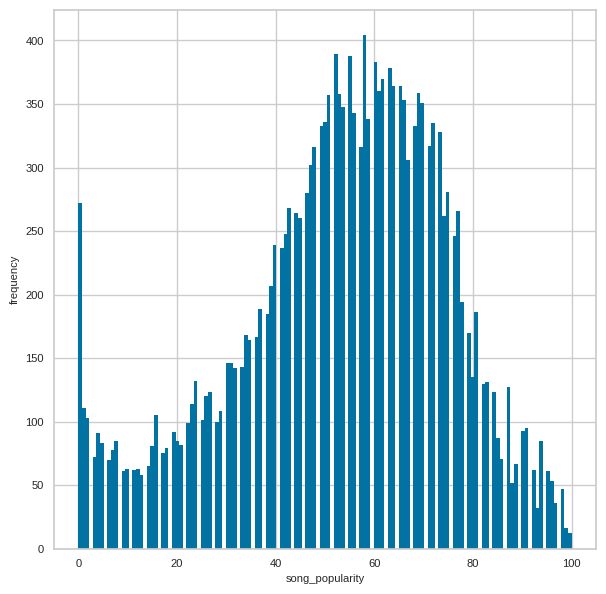

In [ ]:
#Graphic to study the distribution of song_popularity
ds["song_popularity"].hist(bins=137, figsize=(7, 7), xlabelsize=8, ylabelsize=8);
plt.xlabel("song_popularity", fontsize=8)
plt.ylabel("frequency", fontsize=8)


### Binary and Categorical variables


In [ ]:
ds["audio_mode"].unique()

array([1, 0])

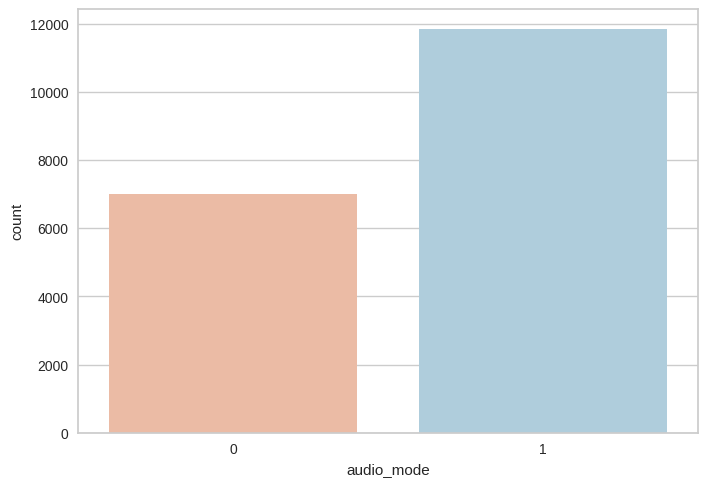

In [ ]:

plt.figure()
sns.countplot(x='audio_mode', data=ds, palette='RdBu')
plt.xticks([0,1])
plt.show()

As we can see our variable "audio_mode" is a binary feature that indicates whether a song is primarily instrumental (when value=1) or primarily contains vocals (when value=0). The bar plot below indicates that around 63% of our dataset is primarily instrumental. Some type of genre that are primarily instrumental are associated with classical or jazz music.

In [ ]:
ds['time_signature'].unique()

array([4, 3, 1, 5, 0])

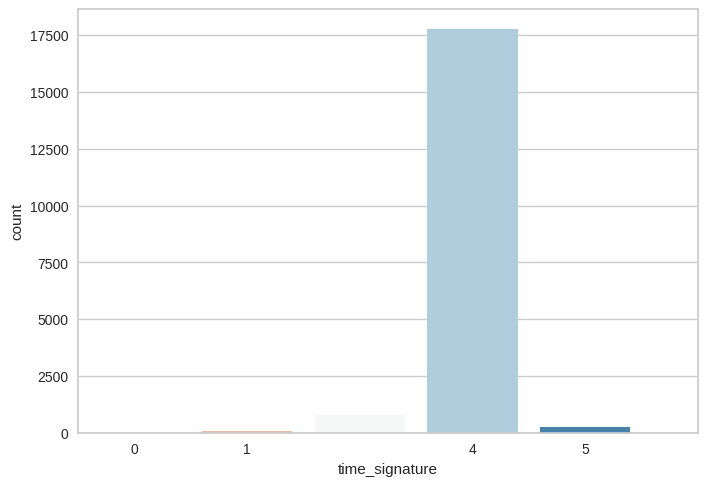

In [ ]:
plt.figure()
sns.countplot(x='time_signature', data=ds, palette='RdBu')
plt.xticks([0, 1, 3, 4, 5])
plt.show()

We can see that our variable "time_signature" is a categorical variable that indicates the number of beats in each bar song. Simple time signatures (most common) are represented by the values 2, 3 and 4 and the remaining signatures are considered as compound. In our dataset we have around 93% of song which the time_signature is 4. One of the most common time signatures. But also we have a little percentage of time_signature= 1 or time_signature= 5.

## Numeric Variables- Histograms

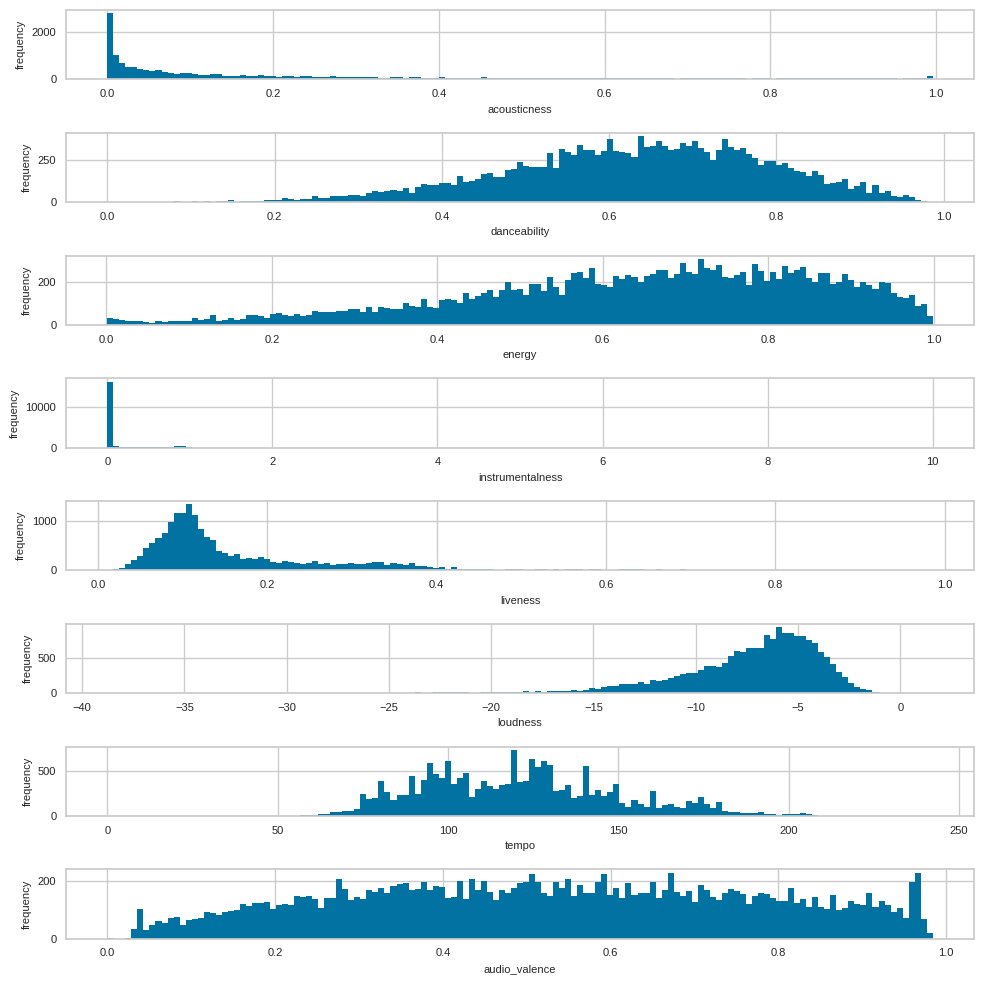

In [ ]:
#the distribution of the other variables
cols =['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'audio_valence']

fig, axs = plt.subplots(nrows=len(cols), figsize=(10, 10))

for i, col in enumerate(cols):
    ds[col].hist(bins=137, ax=axs[i], xlabelsize=8, ylabelsize=8)
    axs[i].set_xlabel(col, fontsize=8)
    axs[i].set_ylabel('frequency', fontsize=8)

plt.tight_layout()
plt.show()


## Numeric Variables- Boxplots

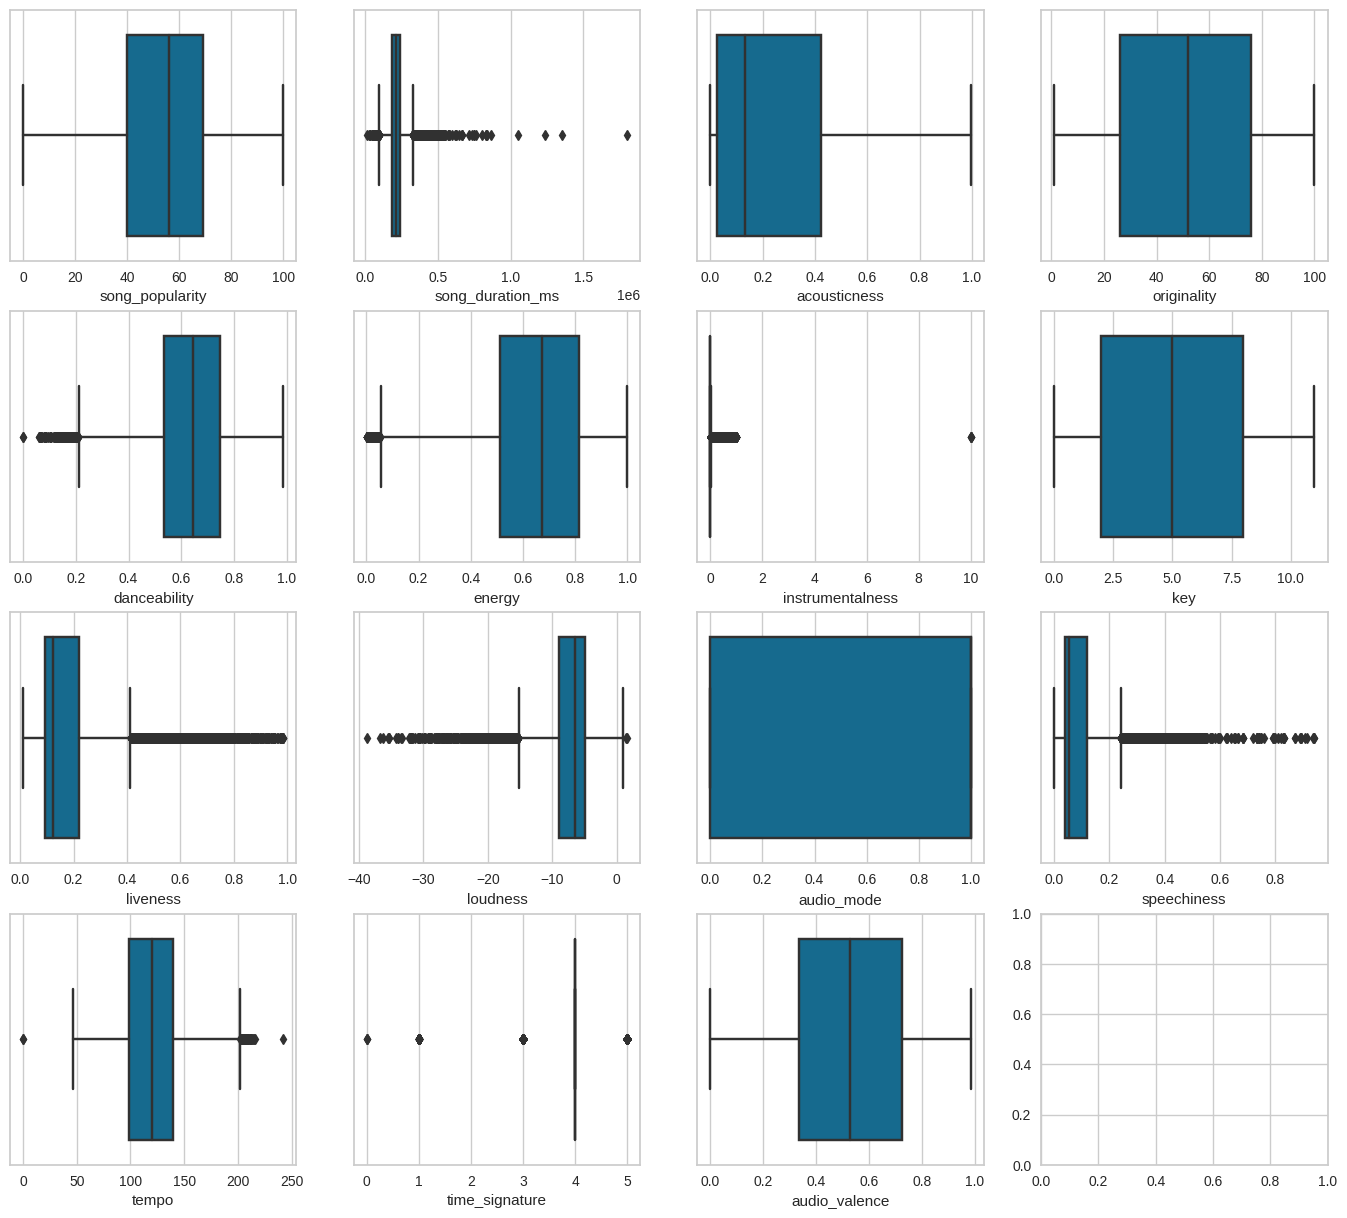

In [ ]:
#Do boxplots of all numerical variables
numerical=ds.select_dtypes(include=[np.number]).columns.tolist()
fig, ax = plt.subplots(4,4 , figsize=(17, 15))
for var, subplot in zip(ds[numerical], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)


* We can see a significant number of outliers in song_duration_ms. 
* Tempo, liveness, loudness and speechiness are features that can have larger impact on popularity and as we can see we have some outliers that we should deal with later.

In [ ]:
#Calculate the correlation matrix for all the variables in ds and then selects the target variable.
corr_matrix= ds.corr()
song_populatiry_corr= corr_matrix["song_popularity"]
print(song_populatiry_corr)

song_popularity     1.000000
song_duration_ms   -0.018899
acousticness       -0.065181
originality         0.017308
danceability        0.104290
energy              0.001365
instrumentalness   -0.107865
key                -0.013160
liveness           -0.038937
loudness            0.099442
audio_mode         -0.004969
speechiness         0.021479
tempo              -0.022672
time_signature      0.034983
audio_valence      -0.052895
Name: song_popularity, dtype: float64


* As we can see none of the variables shows a significant positive or negative correlation with the target variable, song popularity. 

In [ ]:
top_corr_vars = song_populatiry_corr.drop('song_popularity').nlargest(2)
for var, corr in top_corr_vars.iteritems():
    print(f"{var} has a correlation coefficient of {corr:.3f} with song_popularity")


danceability has a correlation coefficient of 0.104 with song_popularity
loudness has a correlation coefficient of 0.099 with song_popularity


* "danceability" and "loudness" are the two variables with highest positive correlation with our target variable but the correlations are relatively low - less than 0.11.

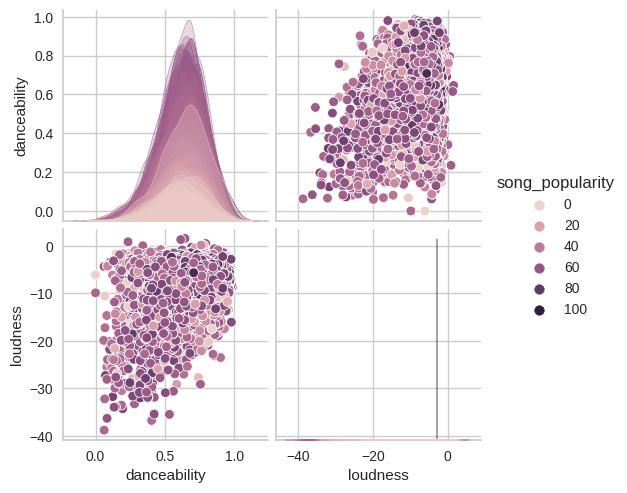

In [ ]:
# Pair plot with variables with highes positive correlation with song_popularity
#cols=['song_popularity','song_duration_ms','acousticness','originality']
cols=['song_popularity','danceability','loudness']
g = sns.pairplot(ds[cols], hue="song_popularity")

In [ ]:
top_corr_vars = song_populatiry_corr.drop('song_popularity').nsmallest(2)
for var, corr in top_corr_vars.iteritems():
    print(f"{var} has a correlation coefficient of {corr:.3f} with song_popularity")


instrumentalness has a correlation coefficient of -0.108 with song_popularity
acousticness has a correlation coefficient of -0.065 with song_popularity


* On the other hand, "instrumentalness" and "acoustiness" are the one with highest negative correlation. 

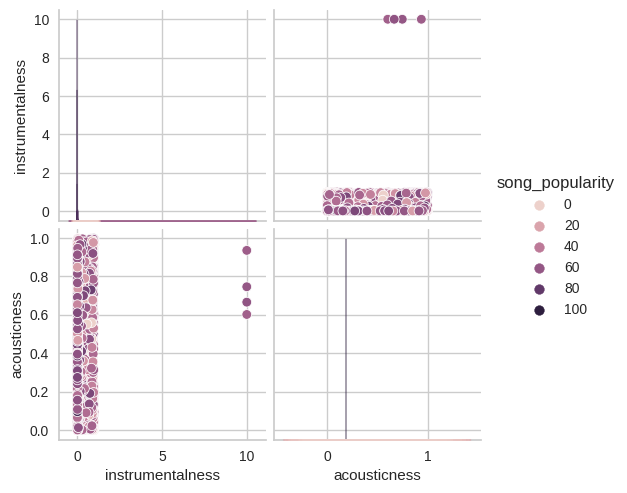

In [ ]:
# Pair plot with variables with highes positive correlation with song_popularity
cols=['song_popularity','instrumentalness','acousticness']
g = sns.pairplot(ds[cols], hue="song_popularity")

('danceability', 'energy', 'instrumentalness', 'key')

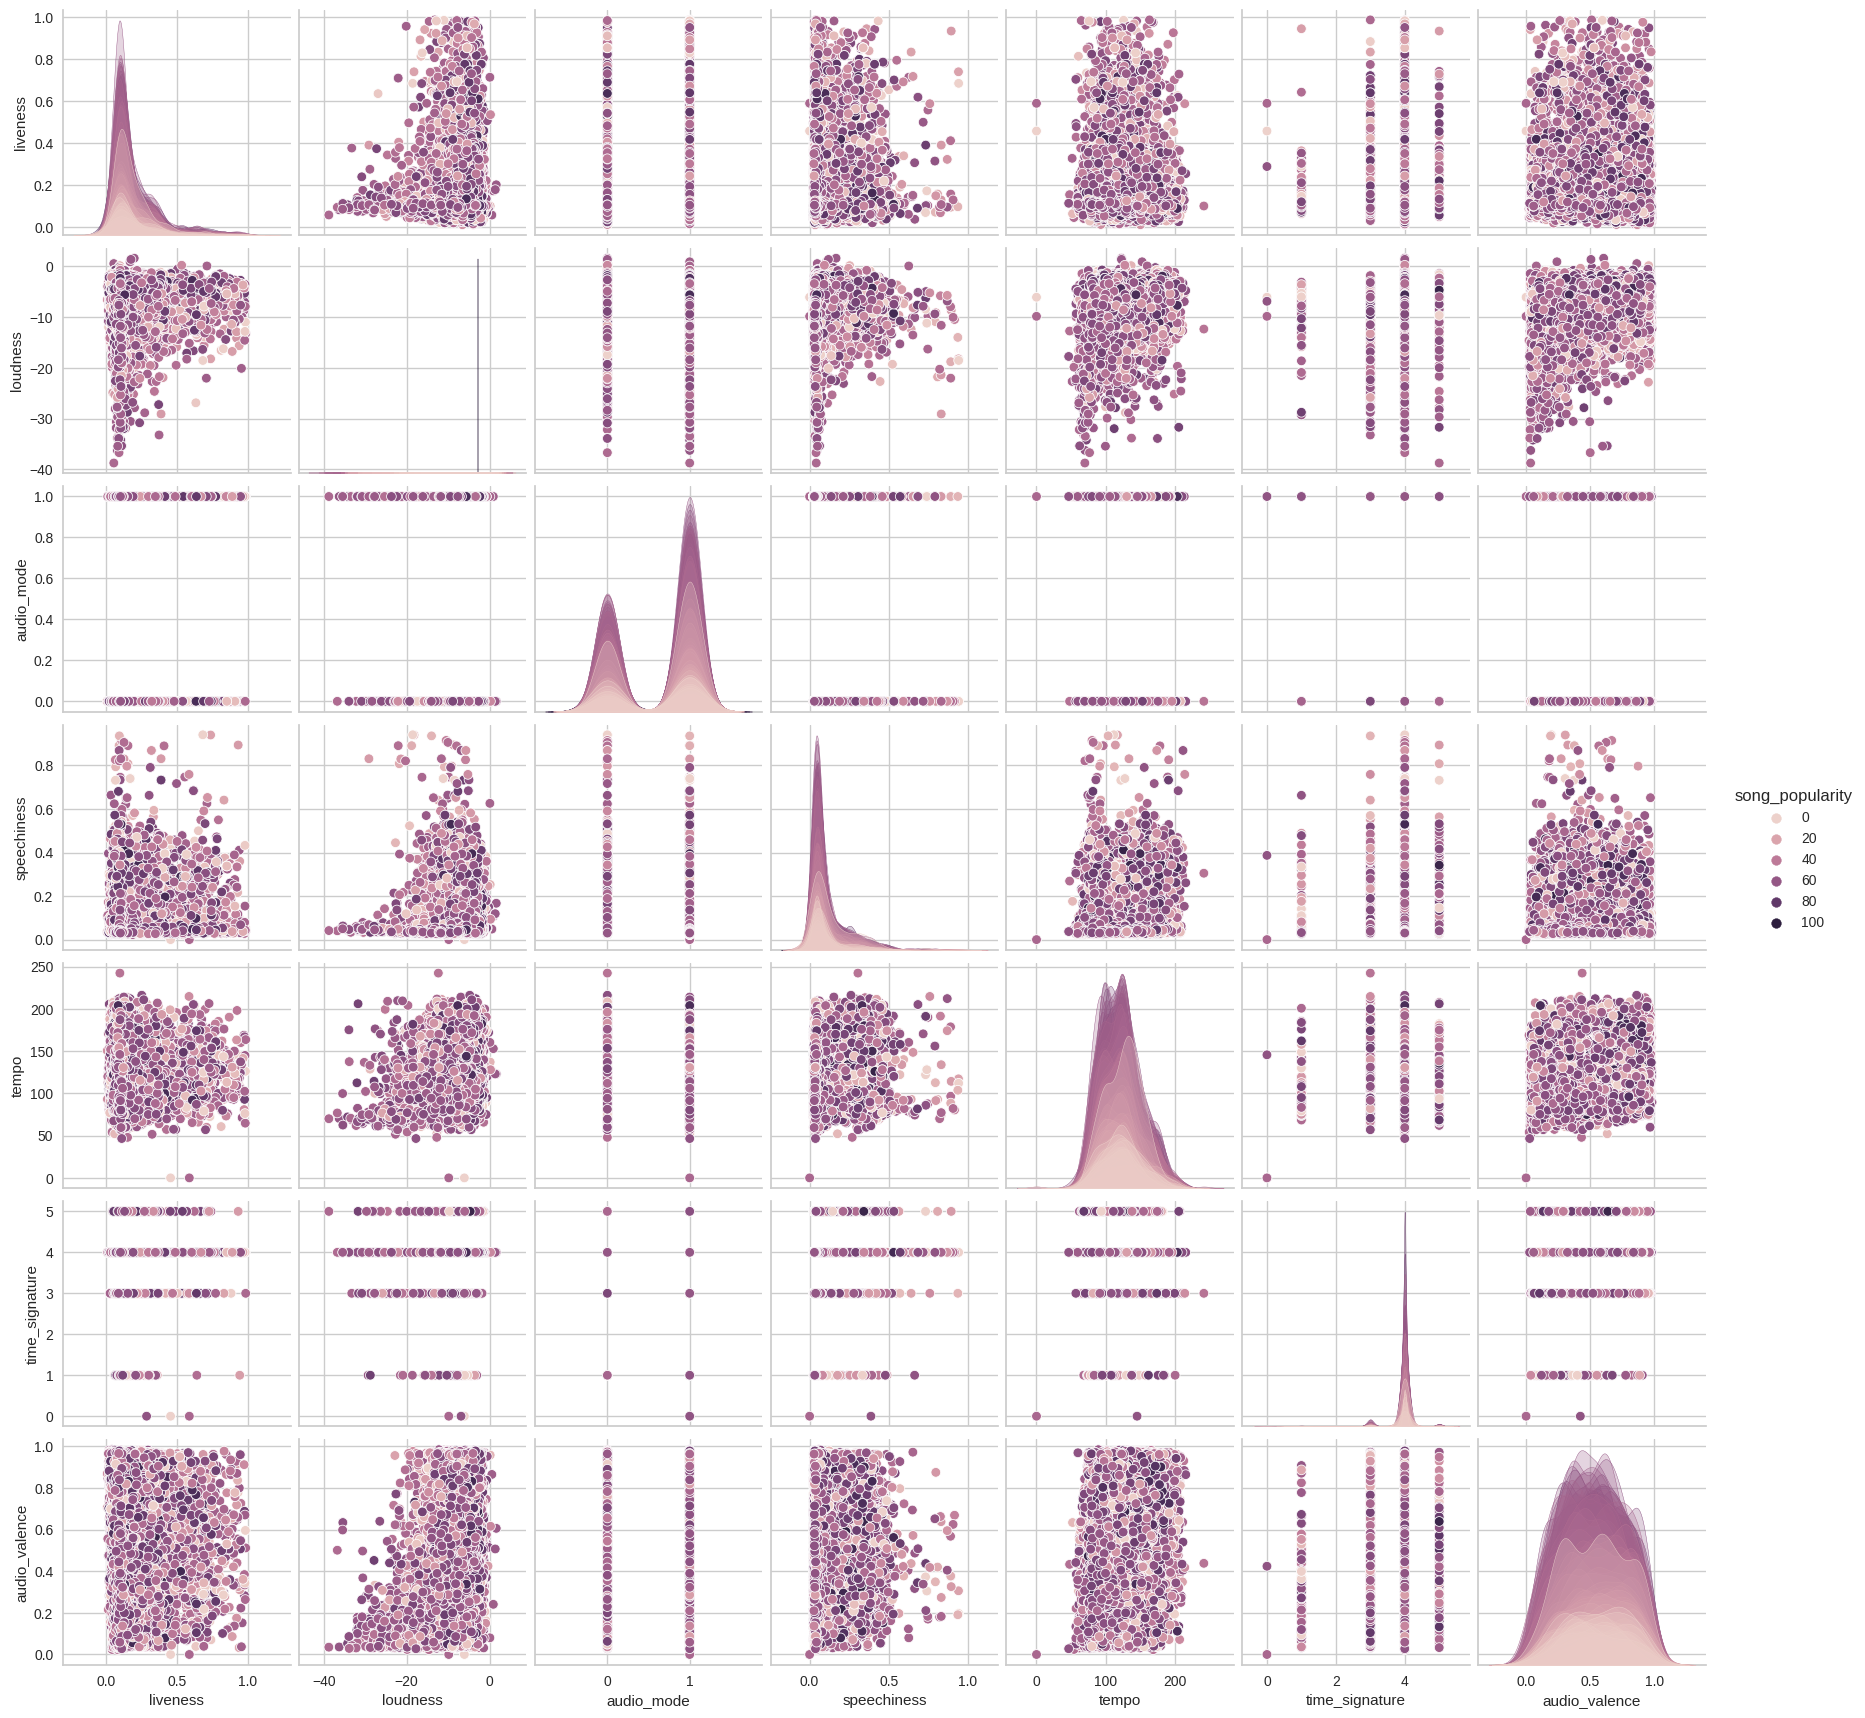

In [ ]:
# Pair plot some of the numerical variables with song_popularity
cols=['song_popularity', "liveness", "loudness", "audio_mode", "speechiness", "tempo", "time_signature", "audio_valence"]
g = sns.pairplot(ds[cols], hue="song_popularity")
'danceability', 'energy', 'instrumentalness', 'key',

<Axes: >

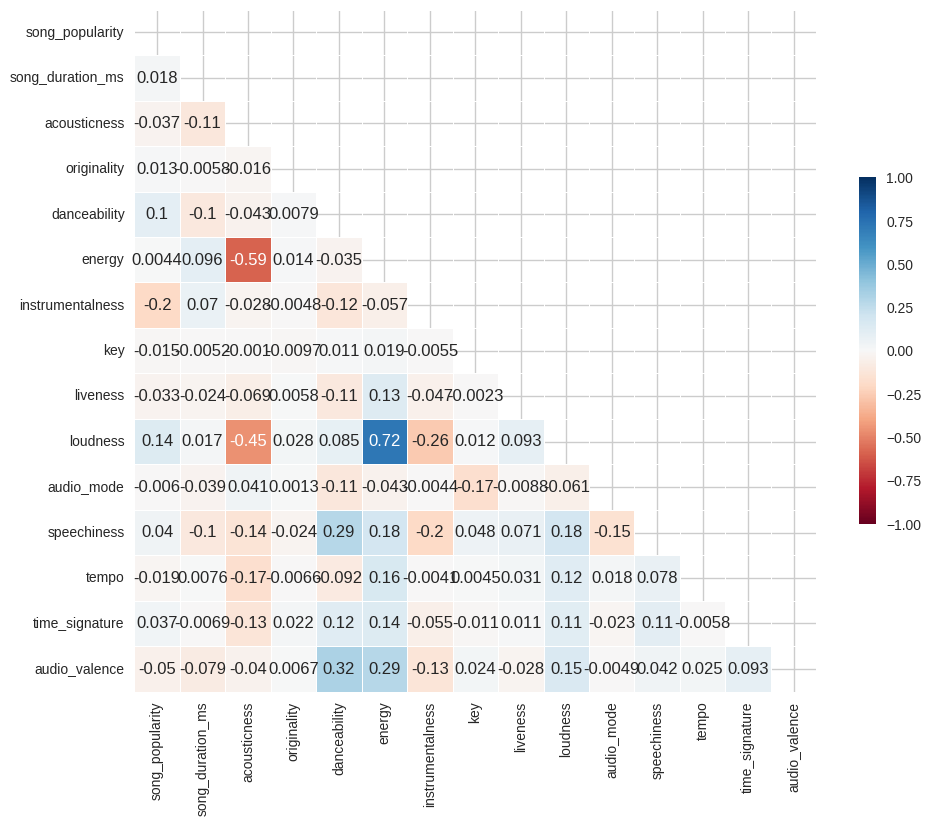

In [ ]:
# Compute the correlation matrix - Spearman
corr = ds.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

We decided also to computed the correlation between all the variables and some information we found is:
* "Loudness" and "Energy" have the highest positive correlation compared with all the other variables. This means that if  one of them increases, the other will also increase.
* In opposite direction, "Energy" and "Acoustiness" have the highest negative correlation which means that if one increases the other one will decrease. They behave in opposite direction.
* Also in the negative way, we can see that "Loudness" and "Acousticness" have a correlation coefficient of -0,45, which is already a medium strengh of correlation. 

#Data Preparation

In [ ]:
# Create a modeling dataset from the original dataset
X = ds.copy(deep=True)

Taking into account what we observe in the data understanding phase, we saw that the variable "Originality" had a significant number of missing values (69,51%) the solution we addopt was to remove this variable from the data set. This decision was took under 2 reasons: 
* One of them is based in the aspect that originality is a hard thing to meausure or compare, since it´s quiteb subjective. 
* The other reason is that by amputating with random values considering their stadistics such as the mean, min, max, std constant to the missing values, this would not be representative or "real" to our model, since we would be taking conclusions based only on 31,49% of data. 

As a result of this, we evaluted the risk of taking this variable out and its relevance to our model concerning the objetive.

In [ ]:
# Since in data understanding we determined that the "originality" column wouldn't be of much use, it's better to delete it to save processing power
del X["originality"]

In [ ]:
X = X.drop_duplicates(["song_name", "song_popularity","song_duration_ms","acousticness", "danceability","energy","instrumentalness","key","liveness","loudness","audio_mode","speechiness", "tempo", "audio_valence"])
X.duplicated(subset=["song_name", "song_popularity","song_duration_ms","acousticness", "danceability","energy","instrumentalness","key","liveness","loudness","audio_mode","speechiness", "tempo", "audio_valence"]).sum()

0

In [ ]:
len(X.index)

14928

* We found that we have 14928 rows in our data after removing duplicate rows (i.e. rows that had exactly the same values in all variables). We don't believe that these were different versions of each song or the same song sung by different authors, since if this were the case, variables such as tempo or loudness would have been different.

In [ ]:
#Since the song_name column contains strings, which the machine learning models we plan to use can't process, we decided to drop that column too.
del X ["song_name"]

* Since the song name is not a relevant variable to our model, and would constrain his implementation we decided to take this variable out of our dataset.
* After all, we can say that there are songs with exactly the name but what defines and makes the difference between one and another is all their features together.

In [ ]:
# We detected 6 songs that didn't have any information about "instrumentalness", we decided to replace the null values with the median

X["instrumentalness"] =  X["instrumentalness"].fillna((X["instrumentalness"].median()))
X["instrumentalness"].isna().sum()

0

## Handling Outliers: 
##### Outliers are data points that are significally different from our data. As we showed before in our bloxplot graph, we have some variables that have a significant number of outliers such as liveness, loudness and speechiness. 
##### We did three differents approaches such as log and boxcox transformation and also median of the variable but the results were not as good as we expected.
##### Finally we decided to transform the outliers using the median instead of deleting them so they are no longer outliers. In this way, we can have normally distributed data. 


In [ ]:
# We replace the outliers with the median for each feature
median = X.loc[(X['liveness']>0.6) & (X['liveness']<0.15), 'liveness'].median()
X.loc[X.liveness < 0.6, 'liveness'] = median
X.loc[X.liveness > 0.15, 'liveness'] = median

median = X.loc[(X['song_duration_ms']>80000) & (X['song_duration_ms']<350000), 'song_duration_ms'].median()
X.loc[X.song_duration_ms < 80000, 'song_duration_ms'] = median
X.loc[X.song_duration_ms > 350000, 'song_duration_ms'] = median

median = X.loc[(X['danceability']>0.05) & (X['danceability']<0.2), 'danceability'].median()
X.loc[X.danceability < 0.05, 'danceability'] = median
X.loc[X.danceability > 0.2, 'danceability'] = median

median = X.loc[(X['loudness']>-15) & (X['loudness']<1), 'loudness'].median()
X.loc[X.loudness < -15, 'loudness'] = median
X.loc[X.loudness > 1, 'loudness'] = median

median = X.loc[X['speechiness']<0.25, 'speechiness'].median()
X.loc[X.speechiness > 0.25, 'speechiness'] = np.nan
X.fillna(median,inplace=True)

median = X.loc[(X['tempo']>49) & (X['tempo']<200), 'tempo'].median()
X.loc[X.tempo < 49, 'tempo'] = median
X.loc[X.tempo > 200, 'tempo'] = median

X.loc[X.time_signature != 4, 'time_signature'] = 4

median = X.loc[X['instrumentalness']<1, 'instrumentalness'].median()
X.loc[X.instrumentalness > 0.2, 'instrumentalness'] = np.nan
X.fillna(median,inplace=True)


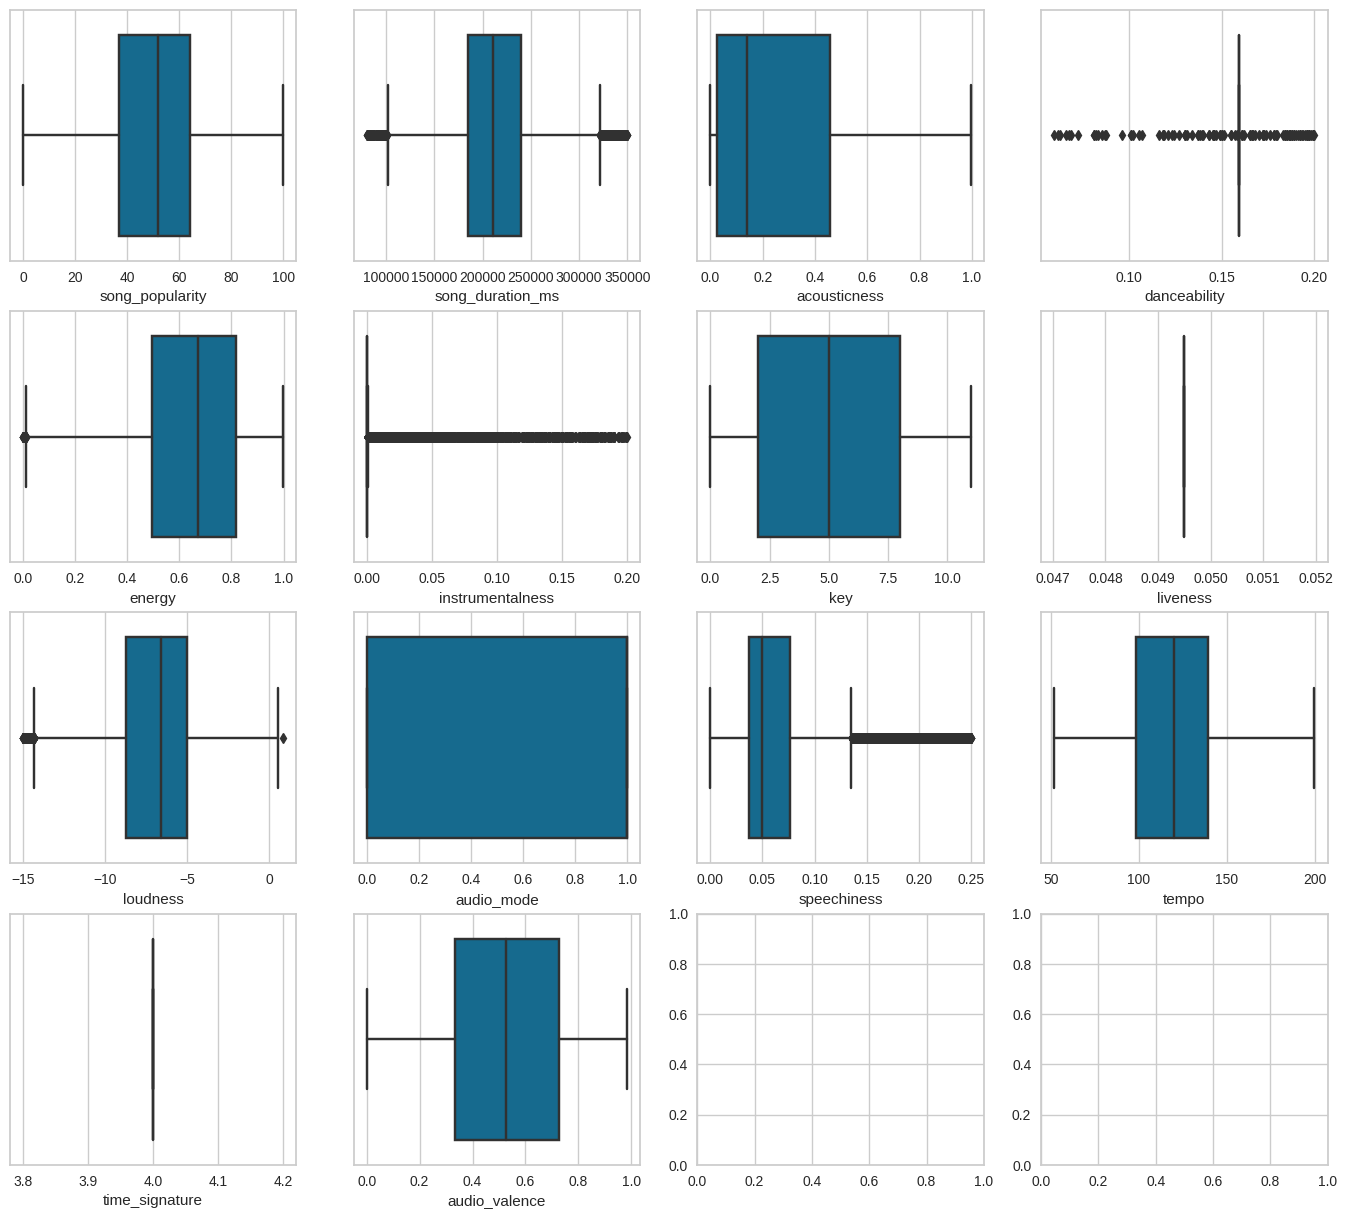

In [ ]:
#Do boxplots of all numerical variables again to check our variables after the removal of outliers
numerical=X.select_dtypes(include=[np.number]).columns.tolist()
fig, ax = plt.subplots(4,4 , figsize=(17, 15))
for var, subplot in zip(X[numerical], ax.flatten()):
    sns.boxplot(x=X[var], ax=subplot)

* After handling with the outliers in our data, we can see that we still have some outliers. This can be for many reasons, such measurement errors, data entry errors, and we in this case we would say we have natural variability in some variables. We decided to continue our model with the outliers since they can also be helpful. These remaining outliers are representative in our dataset knowing we are dealing with different types of songs.

In [ ]:
X

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.1595,0.682,0.000029,8,0.0495,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.1595,0.853,0.000000,3,0.0495,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.1595,0.463,0.000021,0,0.0495,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.1595,0.970,0.003550,0,0.0495,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.1595,0.766,0.000000,10,0.0495,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,60,159645,0.893000,0.1595,0.151,0.000065,11,0.0495,-6.563,1,0.0348,113.969,4,0.300
18831,60,205666,0.765000,0.1595,0.161,0.000001,11,0.0495,-14.078,0,0.0301,94.286,4,0.265
18832,23,182211,0.847000,0.1595,0.325,0.000000,0,0.0495,-12.222,1,0.0355,130.534,4,0.286
18833,55,210826,0.945000,0.1595,0.326,0.015700,3,0.0495,-12.020,1,0.0328,106.063,4,0.323


# Modelling 

## Model 1: Multi-layer Perceptron (MLP) Regressor

In [ ]:
# Create the Target
y = X['song_popularity']
X = X.drop(['song_popularity'], 1)

<ipython-input-188-c02f85676d70>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [ ]:
# Normalize training data
scaler = MinMaxScaler(feature_range=(0, 1))

# MinMax scaler returns an array, so the dataframe must be recreated
ds_scaled = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)

In [ ]:
# Split the dataset intro train and test
X_train, X_test, y_train, y_test = train_test_split(ds_scaled, y, train_size = 0.75, test_size = 0.25, random_state = 123)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11196, 13)
X_test shape: (3732, 13)
y_train shape: (11196,)
y_test shape: (3732,)


In [ ]:
# Create the model
estimator = MLPRegressor(random_state=123, hidden_layer_sizes=6, max_iter=400)

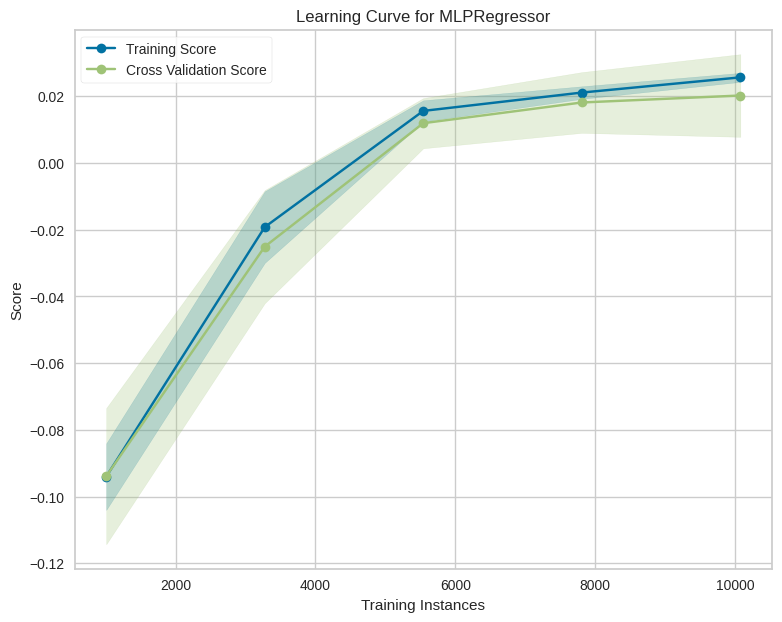

<Axes: title={'center': 'Learning Curve for MLPRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
# Plot the learning curve
fig, ax = plt.subplots(figsize=(9, 7))
cv = 10
sizes = np.linspace(0.1, 1.0, 5)
visualizer = LearningCurve(estimator=estimator, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=4, random_state=123)
visualizer.fit(X_train, y_train)
visualizer.show(ax=ax)

The initial R-squared scores of -0.9 suggest that the initial model is not performing well on the data. But we can see that,  as the number of samples in the training set increases, the R-squared score for the training set reaches -0.02 and the cross-validation set score increases too, reaching -0.023 at approximately 3.500 in the X-axis. 

This suggests that the model is improving as more data is being used to train it at this point. However, the fact that the prediction accuracy is higher in the training set than in the cross-validation set shows that there is a tendency to overfitting that becomes more prominent as more data is added.

Both lines continue to be slightly separated, but they go up progressively, reaching 0.02 for the training set and 0.022 on the cross-validation set by the end of the analysis.

The learning curve plot suggests that the model may be overfitting the training data, and its performance on the unseen data is not good. Plus, the cross-validation set has a much wider shade than the training set, which indicates that the variance is higher. This means that the predictive accuracy of this model is not as good on unseen data as on the training data.

In [ ]:
# Create and train the model
estimator.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.



MLPRegressor(hidden_layer_sizes=6, max_iter=400, random_state=123)

###Evaluation 1

In [ ]:
# predict y for X_train and X_test
y_pred_train = estimator.predict(X_train) 
y_pred_test = estimator.predict(X_test) 

In [ ]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest,set1='Train', set2='Test'):
  measures_list = ['MAE','RMSE', 'R^2','MAPE (%)','MAX Error']
  train_results = [metricsObj.mean_absolute_error(yTrain, yPredTrain),
                np.sqrt(metricsObj.mean_squared_error(yTrain, yPredTrain)),
                metricsObj.r2_score(yTrain, yPredTrain),
                metricsObj.mean_absolute_percentage_error(yTrain, yPredTrain),
                metricsObj.max_error(yTrain, yPredTrain)]
  test_results = [metricsObj.mean_absolute_error(yTest, yPredTest),
                np.sqrt(metricsObj.mean_squared_error(yTest, yPredTest)),
                metricsObj.r2_score(yTest, yPredTest),
                  metricsObj.mean_absolute_percentage_error(yTest, yPredTest),
                metricsObj.max_error(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, set1: train_results, set2:test_results})
  return(resultsDF)

In [ ]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,MAE,1.595498e+01,1.590350e+01
1,RMSE,2.010380e+01,2.013356e+01
2,R^2,2.526649e-02,2.760293e-02
3,MAPE (%),3.620811e+15,3.215909e+15
4,MAX Error,5.566849e+01,5.445531e+01


MAE (Mean Absolute Error): The predictions have an average error of about 16 units for both the training and test datasets.

RMSE (Root Mean Squared Error): We have a higher error than the MAE metric, with a value of about 20 units for both the training and test datasets.

R^2 (R-squared): The model's performance is quite weak, with only a small portion of the variance in the target variable being explained by the model. 

MAPE (Mean Absolute Percentage Error): The model's performance is inadequate, with very high MAPE values of about 3.62e+15 for the training dataset and 3.22e+15 for the test dataset.

MAX Error: The model made some significant errors in predicting the target variable, with a maximum error of about 55-56 units for both the training and test datasets, which is extremely high.

Overall, these results suggest that the model's performance is relatively poor, and it needs further refinement or improvement to make better predictions.

In [ ]:
# Visualize predictions vs target values 
temp = y_test.to_frame()
temp['Prediction'] = y_pred_test
temp['Residual'] = y_test - temp.Prediction
temp

,song_popularity,Prediction,Residual
10680,64,49.660577,14.339423
18120,61,54.062454,6.937546
5014,31,42.456785,-11.456785
17529,47,50.485126,-3.485126
2031,11,38.365996,-27.365996
...,...,...,...
10940,54,46.395431,7.604569
1465,61,47.629202,13.370798
761,48,45.143354,2.856646
3159,79,48.341831,30.658169


* By looking our residual column, we can determinate whether the models tends to overestimate or underestimares song_popularity and by how much.
A positive residual indicates that the model underestimated the target variable as we can see in the first row a residual of 14.33, while a negative residual indicates that it overestimated it as we can see in the 3rd row with -11.45 of residual.

 Ideally, it is good to see the predicted values closely aligning with the actual values, with few large discrepancies or outliers.

 In this case, some of the predicted values are quite close to the actual values, as seen in rows 2, 4, and 8, where the residuals are 6.93, -3.48, and 2.86 respectively. However, some of the predictions have larger residuals, as seen in rows 1, 3, and 5, where the residuals are 14.34, -11.46, and -27.37 respectively. This indicates that the model is not consistently accurate in predicting song popularity.

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names



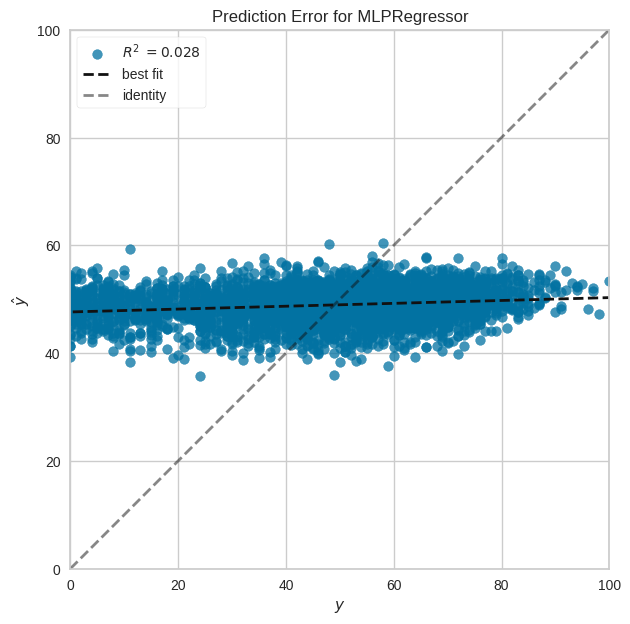

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
# Visualize the prediction error
fig, ax = plt.subplots(figsize=(9, 7))
predError_vis = PredictionError(estimator)
predError_vis.fit(X_train, y_train)  # Fit the training data to the visualizer
predError_vis.score(X_test, y_test)  # Evaluate the model on the test data
predError_vis.show(ax=ax)

* We can say that the fact that our point are concentrated between 40 and 50 indicate that the model is doing a good job in predicting the target values within that range. However, the presence of outliers in 60 might be predictions significantly off from the actual values.

* The fact that the R^2 value is close to 0 indicates that the model is not performing well overall. Ideally, you would want an R^2 value that is close to 1.
* Finally, our identity line on our plot represents the perfect prediction line, where the predicted value is exactly equal to the actual target value. As we can see on the best fit line, the predictions were very far off.




Summarising
- All things considered, based on the evaluation metrics, we can say that the model does not perform well in predicting the target variable.

## Model 2: MLPRegressor With Randomized Search

In [ ]:
# Execute Randomized Search to hyper tune parameters
random_param = {'hidden_layer_sizes': [3,4,5,6,7,8],
          'activation': ['tanh', 'relu'],
          'solver':['lbfgs', 'adam'],
          'alpha':[0.0001, 0.002, 0.05],
          'batch_size':['auto'],
          'learning_rate':['constant'],
          'learning_rate_init':[0.001, 0.002],
          'max_iter':[100,300,500,700,900],
          'random_state':[123]}
reg = MLPRegressor()
rand = RandomizedSearchCV(reg, param_distributions=random_param, cv=5, n_iter = 20)
rand.fit(X_train, y_train)
print("Random search best parameters: {}".format(rand.best_params_))

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

Random search best parameters: {'solver': 'adam', 'random_state': 123, 'max_iter': 700, 'learning_rate_init': 0.002, 'learning_rate': 'constant', 'hidden_layer_sizes': 6, 'batch_size': 'auto', 'alpha': 0.05, 'activation': 'relu'}


In [ ]:
# Create the model
estimator = MLPRegressor(**rand.best_params_)

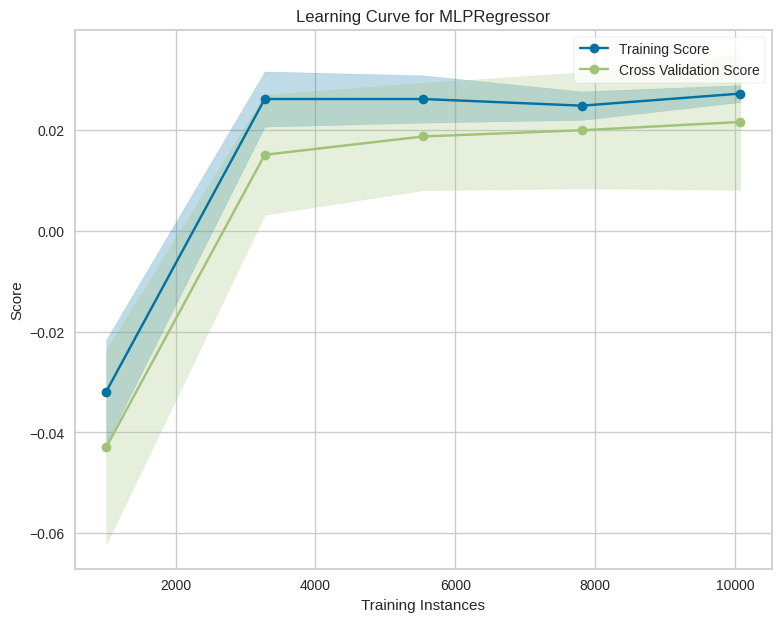

<Axes: title={'center': 'Learning Curve for MLPRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
# Plot the learning curve
fig, ax = plt.subplots(figsize=(9, 7))
cv = 10
sizes = np.linspace(0.1, 1.0, 5)
visualizer = LearningCurve(estimator=estimator, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=4, random_state=123)
visualizer.fit(X_train, y_train)
visualizer.show(ax=ax)

* As we can see in the learning curve plotted shows that the model performance changes as the amount of training data increases.  The shaded area from training and cross validation are not that close but covering some of the area, this indicates that the training score is overfitting the training data, this occurs when the model is too complex relative to the amount of training data and start to fit to the noise in the data rather than the underlying patterns. 
The R-squares score of training set reaches a peak to 0.025 and the cross-validation set score to 0.015 at approximately 3.500 in the X-axis. This suggest that the model is improving as more data is being used to the train at this point. Looks from this point until the next score at 0.025 in training set and 0.019 in cross-validation set when it has around 5 500 training instances, is when the model have the highest overfitting. After this two score the model is not improving significantly with the additional training data is this case around 7500 in the X-axis. 
After this point at 7 500 training instances, the training score to remains relatively constant, while the cross-validation scores improve slightly, indicating that the model is starting to generalize better the new data.  



In [ ]:
# Create and train the model
estimator.fit(X_train, y_train)

MLPRegressor(alpha=0.05, hidden_layer_sizes=6, learning_rate_init=0.002,
             max_iter=700, random_state=123)

###Evaluation 2

In [ ]:
# predict y for X_train and X_test
y_pred_train = estimator.predict(X_train) 
y_pred_test = estimator.predict(X_test) 

In [ ]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest,set1='Train', set2='Test'):
  measures_list = ['MAE','RMSE', 'R^2','MAPE (%)','MAX Error']
  train_results = [metricsObj.mean_absolute_error(yTrain, yPredTrain),
                np.sqrt(metricsObj.mean_squared_error(yTrain, yPredTrain)),
                metricsObj.r2_score(yTrain, yPredTrain),
                metricsObj.mean_absolute_percentage_error(yTrain, yPredTrain),
                metricsObj.max_error(yTrain, yPredTrain)]
  test_results = [metricsObj.mean_absolute_error(yTest, yPredTest),
                np.sqrt(metricsObj.mean_squared_error(yTest, yPredTest)),
                metricsObj.r2_score(yTest, yPredTest),
                  metricsObj.mean_absolute_percentage_error(yTest, yPredTest),
                metricsObj.max_error(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, set1: train_results, set2:test_results})
  return(resultsDF)

In [ ]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,MAE,1.591566e+01,1.586761e+01
1,RMSE,2.008056e+01,2.010998e+01
2,R^2,2.751858e-02,2.987944e-02
3,MAPE (%),3.617953e+15,3.203488e+15
4,MAX Error,5.529073e+01,5.470878e+01


* These measures suggest that the model is performing similarly on the training and test sets, with relatively low MAE and RMSE values, and low but non-zero R^2 values. However, the extremely high MAPE values suggest that the model may not be performing well on certain data points, possibly due to outliers or other factors. 
* The MAE and RMSE values are relatively close between the two sets, indicating that the model's predictions are not biased towards one set or the other.
* The R^2 values are also quite low, indicating that the model is not explaining a large proportion of the variance in the data, but this could be due to the nature of the problem or the limitations of the data.

In [ ]:
# Visualize predictions vs target values 
temp = y_test.to_frame()
temp['Prediction'] = y_pred_test
temp['Residual'] = y_test - temp.Prediction
temp

,song_popularity,Prediction,Residual
10680,64,50.398694,13.601306
18120,61,55.123403,5.876597
5014,31,42.624536,-11.624536
17529,47,50.889843,-3.889843
2031,11,36.846120,-25.846120
...,...,...,...
10940,54,46.537975,7.462025
1465,61,48.192903,12.807097
761,48,45.210014,2.789986
3159,79,48.401148,30.598852


* By looking our residual column, we can determinate whether the models tends to overestimate or underestimares song_popularity and by how much. A positive residual indicates that the model underestimated the target variable as we can see in the first row a residual of 13.60, while a negative residual indicates that it overestimated it as we can see in the 3rd row with -11.624 of residual.

* Ideally, it is good to see the predicted values closely aligning with the actual values, with few large discrepancies or outliers.

* When looking at the residuals we can say that the model is making fairly large errors in some cases, which is consistent with the poor performance metrics. 

In [ ]:
# Visualize the prediction error
fig, ax = plt.subplots(figsize=(9, 7))
predError_vis = PredictionError(estimator)
predError_vis.fit(X_train, y_train)  # Fit the training data to the visualizer
predError_vis.score(X_test, y_test)  # Evaluate the model on the test data
predError_vis.show(ax=ax)

* We can say that the fact that our point are concentrated between 40 and 50 indicate that the model is doing a good job in predicting the target values within that range. However, the presence of outliers in 60 might be predictions significantly off from the actual values.

* The fact that the R^2 value is close to 0 in this case 0.032 indicates that the model is not performing well overall. Ideally, you would want an R^2 value that is close to 1. 
* Finally, our identity line on our plot represents the perfect prediction line, where the predicted value is exactly equal to the actual target value. As we can see on the best fit line, the predictions were very far off.

##Model 3: Decision Tree Regressor

In [ ]:
# Split the dataset intro train and test
X_train, X_test, y_train, y_test = train_test_split(ds_scaled, y, train_size = 0.75, test_size = 0.25, random_state = 2021)

In [ ]:
# Initialize model
tree_regr = tree.DecisionTreeRegressor(random_state=123, max_depth=4, min_samples_leaf=5)

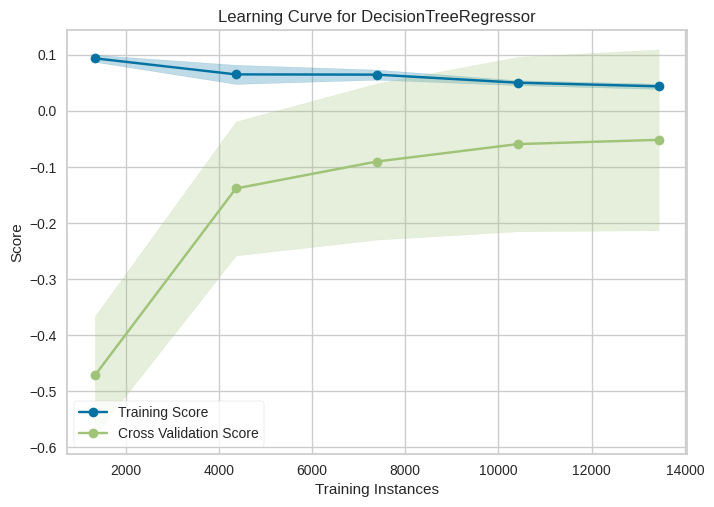

<Axes: title={'center': 'Learning Curve for DecisionTreeRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
# Plot the learning curve
cv = 10
sizes = np.linspace(0.1, 1.0, 5)
visualizer = LearningCurve(estimator=tree_regr, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=4, random_state=123)
visualizer.fit(X, y)
visualizer.show()     


* The decision tree model tends to perform better with higher number of training instances. After the 4200 training instances the training and the cross-validation scores tends to converge.

* The fact that the shade of the cross-validation score is wider than that of the training score at all graph suggests that there is more variance in the model's performance on the validation sets than on the training sets.

* The fact that the cross-validation score is not as high as the training score at the larger sizes of data analyzed could suggest overfitting.

In [ ]:
# Create and train the model
tree_regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=123)

In [ ]:
# Explore feature importance (Gini importance - normalized)
formattedList = [float(format(member,'.6f')) for member in tree_regr.feature_importances_]
formattedList2 = [abs(float(format(member,'.6f'))) for member in tree_regr.feature_importances_]
data_tuples = list(zip(X.columns,formattedList,formattedList2))
coeff_df = pd.DataFrame(data=data_tuples, columns=['Feature','Coefficient','AbsCoefficient'])
coeff_df.reset_index(drop=True, inplace=True)
coeff_df.sort_values(by=['AbsCoefficient'], inplace=True, ascending=False)

,Feature,Coefficient,AbsCoefficient
4,instrumentalness,0.457466,0.457466
7,loudness,0.124775,0.124775
3,energy,0.124594,0.124594
12,audio_valence,0.107343,0.107343
0,song_duration_ms,0.064030,0.064030
1,acousticness,0.063021,0.063021
10,tempo,0.032506,0.032506
9,speechiness,0.026265,0.026265
2,danceability,0.000000,0.000000
5,key,0.000000,0.000000


This means that, in the decision tree model, the instrumentalness has a higher coefficient of all the variables, indicating that this is the most important feature in predicting the targer variable. By contrast, the danceability, key, liveness, audio mode and time signature features have coefficients and absolute coefficients of 0.0, meaning that they have no effect on the model´s predictions.

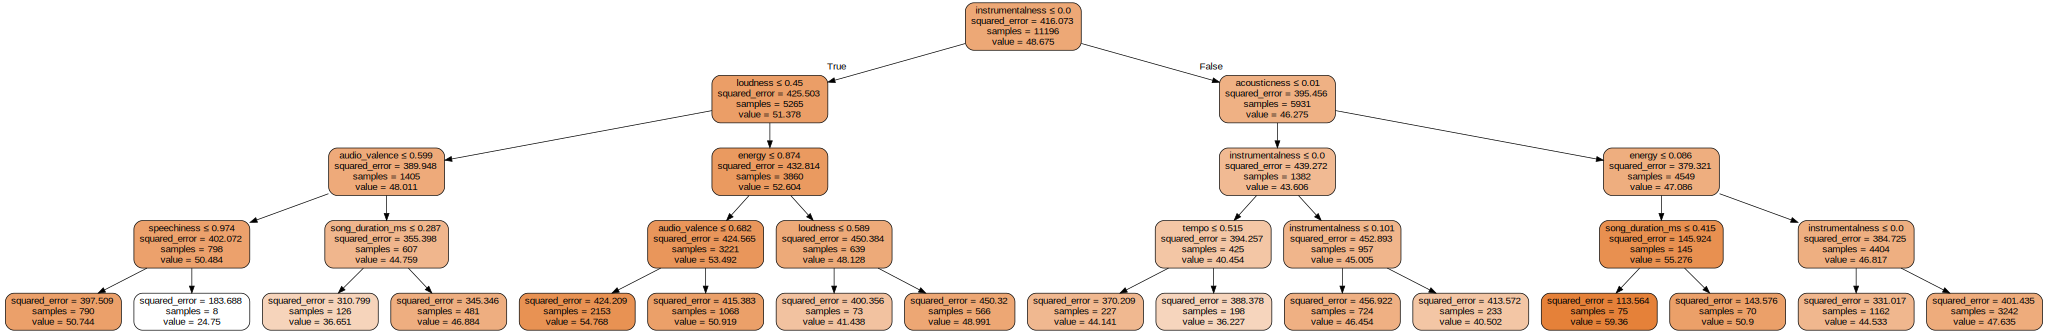

In [ ]:
# Plot the tree
import graphviz
dot_data = tree.export_graphviz(tree_regr, out_file=None, 
                      feature_names=list(X_train.columns),  
                      class_names='Returns',  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

###Evaluation 3

In [ ]:
# predict y for X_train and X_test
y_pred_train = tree_regr.predict(X_train) 
y_pred_test = tree_regr.predict(X_test) 

In [ ]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['MAE','RMSE', 'R^2','MAPE (%)','MAX Error']
  train_results = [metricsObj.mean_absolute_error(yTrain, yPredTrain),
                np.sqrt(metricsObj.mean_squared_error(yTrain, yPredTrain)),
                metricsObj.r2_score(yTrain, yPredTrain),
                metricsObj.mean_absolute_percentage_error(yTrain, yPredTrain),
                metricsObj.max_error(yTrain, yPredTrain)]
  test_results = [metricsObj.mean_absolute_error(yTest, yPredTest),
                np.sqrt(metricsObj.mean_squared_error(yTest, yPredTest)),
                metricsObj.r2_score(yTest, yPredTest),
                  metricsObj.mean_absolute_percentage_error(yTest, yPredTest),
                metricsObj.max_error(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [ ]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,MAE,1.587427e+01,1.593746e+01
1,RMSE,1.994679e+01,2.007753e+01
2,R^2,4.373878e-02,2.367180e-02
3,MAPE (%),3.311562e+15,3.666291e+15
4,MAX Error,5.476823e+01,5.476823e+01


* The model achieved a MAE of 15.93 on the test set, which means on average, the predictions are off by 15.93 units from the actual values. This value is relatively high, meaning that the predictions are not that good.

* The model achieved an RMSE of 20.07 on the test set, which means that the average error of the model's prediction is about 20 units.

* The model achieved an R^2 score of 0.02 on the test set and 0.04 on the training set, which indicates that the model overfits the data. In this metric, 1 indicates a perfect fit. Since our value is too far from 1, this shows that the model is not accurate.

* The model achieved a high MAPE of 3.31 x 3.66^15 on the test set, which indicates that the model's predictions are not perfect but still have low errors in absolute terms.

* The model achieved a MAX Error of 54.76 on the test set, which is very high and indicates a large prediction error.

After analyzing this data, we can say that the model doesn't performs well in predicting the target variable. 

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



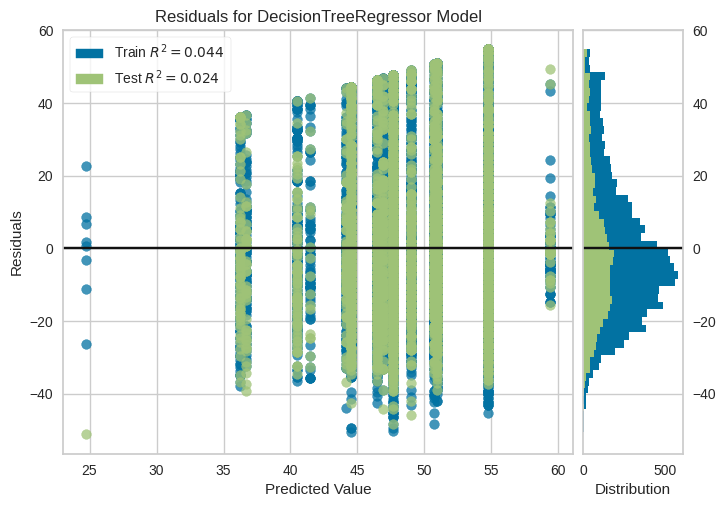

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
# Visualize the residuals
residuals_vis = ResidualsPlot(tree_regr)
residuals_vis.fit(X_train, y_train)  # Fit the training data to the visualizer
residuals_vis.score(X_test, y_test)  # Evaluate the model on the test data
residuals_vis.show() 

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



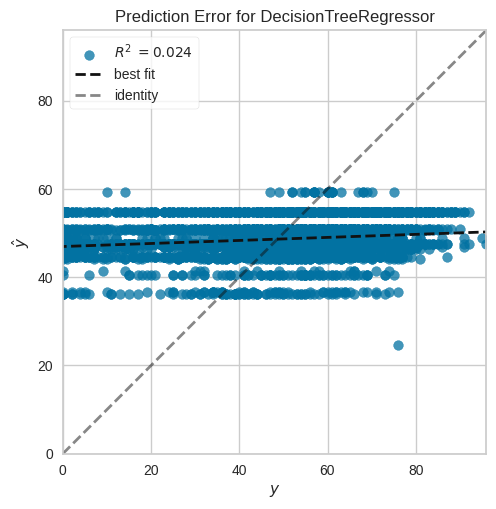

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
# Visualize the prediction error
predError_vis = PredictionError(tree_regr)
predError_vis.fit(X_train, y_train)  # Fit the training data to the visualizer
predError_vis.score(X_test, y_test)  # Evaluate the model on the test data
predError_vis.show() 

Summarising

All things considered, based on the evaluation metrics, we can say that the model is not performing well in predicting the target variable.

##Model 4: MLP Regression with Optuna hyperparameter optimization

* Optuna is a Python library  that provide an automated hyperparameter optimization framework, it will automatically search for the best combination of hyperparamenters.

In [ ]:
# Split the dataset intro train and test
X_train, X_test, y_train, y_test = train_test_split(ds_scaled, y, train_size = 0.75, test_size = 0.25, random_state = 123)

In [ ]:
# Use optuna to search for the best parameters
def objective(trial):
      hidden_layer_sizes = trial.suggest_int('hidden_layer_sizes', 3, 8)
      max_iter = trial.suggest_int('max_iter', 500, 1000)
      reg = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=123)
      return cross_val_score(reg, X_train, y_train, 
           n_jobs=-1, cv=5, scoring='r2').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

trial = study.best_trial
print('r2: {}'.format(trial.value))

print("Best hyperparameters: {}".format(trial.params))

[I 2023-03-30 19:34:33,931] A new study created in memory with name: no-name-ed4e1139-17f5-4597-a55e-20df28ef08cb
[I 2023-03-30 19:35:20,846] Trial 0 finished with value: 0.014921246663056253 and parameters: {'hidden_layer_sizes': 5, 'max_iter': 974}. Best is trial 0 with value: 0.014921246663056253.
[I 2023-03-30 19:36:19,668] Trial 1 finished with value: 0.01968640169100162 and parameters: {'hidden_layer_sizes': 7, 'max_iter': 968}. Best is trial 1 with value: 0.01968640169100162.
[I 2023-03-30 19:37:01,980] Trial 2 finished with value: 0.021376620032810247 and parameters: {'hidden_layer_sizes': 6, 'max_iter': 814}. Best is trial 2 with value: 0.021376620032810247.
[I 2023-03-30 19:37:49,727] Trial 3 finished with value: 0.014888661005606596 and parameters: {'hidden_layer_sizes': 5, 'max_iter': 737}. Best is trial 2 with value: 0.021376620032810247.
[I 2023-03-30 19:38:30,788] Trial 4 finished with value: 0.014824103075265115 and parameters: {'hidden_layer_sizes': 5, 'max_iter': 569}

r2: 0.0214917847164382
Best hyperparameters: {'hidden_layer_sizes': 6, 'max_iter': 550}


In [ ]:
# Optimization history
optuna.visualization.plot_optimization_history(study)

* As we can see in our Optimization History Plot, the score objetives evaluated at each trial during the hyperparameter search all range between positive points, strating in 0,015 and ending near 0,022. This means that the model ahve learned quite quick and the optimization algorithm initially found a solution that had a relatively high objective function value, but then gradually improved the solution until it reached a more optimal point.

In [ ]:
# Slice by parameter
optuna.visualization.plot_slice(study)

* In the slice plot it show us the distribution of the objective values of the trials in the hyperparameter search space. Our objective values are concentrated between (0,015 and 0.022) as we saw in the plot before, which means that the majority of the trial achieve the results with hyperparamenters in that range. We might said that 0,022 was the best score we achieved which is good, but not the optimal solution to optimize the model.

In [ ]:
# See in a parellell cordinates plot
optuna.visualization.plot_parallel_coordinate(study)

* Here we can find a parallel coordinate plot of the hyperparamenters and objectives values for each trial in the study. Each line correspond to a trial and the color the objective value. As we can see most of our trial achieved bad objectives values from 0. 0147238 to 0.0214918 Our range from interaction or epochs that the algorithm is allowed to perform is from 505 to 974.
* Reggarding the hidden_layers_sizes, the fact we have multiple hyperparameter combinations all of them lead to bad performance, the flexibility in the choice of hyperparameters and those multiple solutions are not valid in the  model.
* Overall the performance of this model is worse than the baseline, which is usually 0. 

In [ ]:
# Create the model
estimator = MLPRegressor(**trial.params)

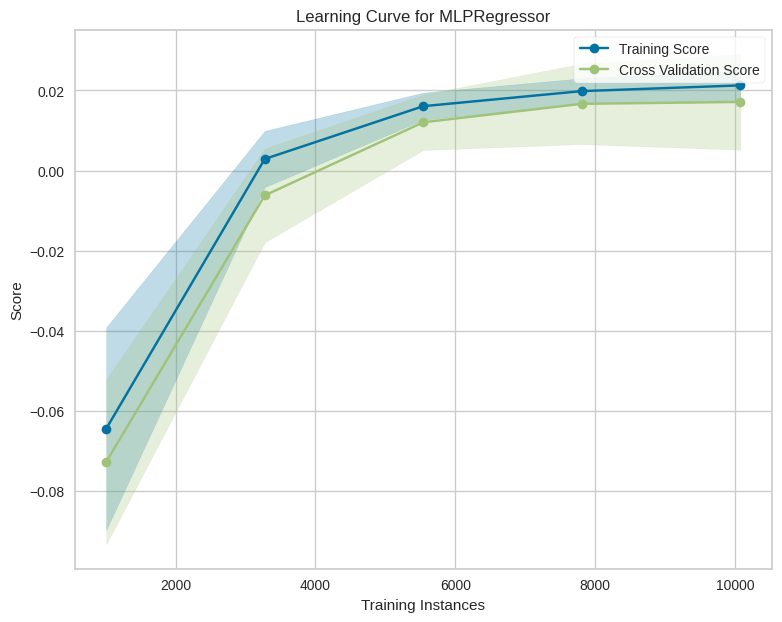

<Axes: title={'center': 'Learning Curve for MLPRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
# Plot the learning curve
fig, ax = plt.subplots(figsize=(9, 7))
cv = 10
sizes = np.linspace(0.1, 1.0, 5)
visualizer = LearningCurve(estimator=estimator, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=4, random_state=123)
visualizer.fit(X_train, y_train)
visualizer.show(ax=ax)

The fact that the two lines are always in almost the same location, very close together suggests that the model is performing consistently on both the training set and the cross-validation set. This indicates that the model is not overfitting or underfitting the data. Instead, it is fitting the data well and generalizing to the unseen data.

By analysing the graph in more detail, we can see that the two lines converge as the number of samples increases, as suggested by the optimization history graph. 

This indicates to us that as the model receives more data, it can learn more elaborately and correctly, predicting future values more correctly. 

The R-squared scores for both the training set and the cross-validation set start very low at -0.56, indicating that the initial model is performing very poorly on the data. However, as the number of samples in the training set increases, both the training score and the cross-validation score increase, which indicates that the model is improving but still not having a good performance that is close to 1.  


In [ ]:
# Create and train the model
estimator.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=6, max_iter=550)

###Evaluation 4

In [ ]:
# predict y for X_train and X_test
y_pred_train = estimator.predict(X_train) 
y_pred_test = estimator.predict(X_test) 

In [ ]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest,set1='Train', set2='Test'):
  measures_list = ['MAE','RMSE', 'R^2','MAPE (%)','MAX Error']
  train_results = [metricsObj.mean_absolute_error(yTrain, yPredTrain),
                np.sqrt(metricsObj.mean_squared_error(yTrain, yPredTrain)),
                metricsObj.r2_score(yTrain, yPredTrain),
                metricsObj.mean_absolute_percentage_error(yTrain, yPredTrain),
                metricsObj.max_error(yTrain, yPredTrain)]
  test_results = [metricsObj.mean_absolute_error(yTest, yPredTest),
                np.sqrt(metricsObj.mean_squared_error(yTest, yPredTest)),
                metricsObj.r2_score(yTest, yPredTest),
                  metricsObj.mean_absolute_percentage_error(yTest, yPredTest),
                metricsObj.max_error(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, set1: train_results, set2:test_results})
  return(resultsDF)

In [ ]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,MAE,1.599575e+01,1.597863e+01
1,RMSE,2.018745e+01,2.024167e+01
2,R^2,1.713807e-02,1.713206e-02
3,MAPE (%),3.630285e+15,3.241103e+15
4,MAX Error,5.596042e+01,5.647177e+01


* The values of MAE and RMSE are higher in the test set than the training set. This indicates that the model is performing worse on new or unseen data. However the difference is not very large, suggesting the model might no be overfiting too severely. 
* Looking at the R^2 which a value of 1 indicates a perfect fit we see that in both the set this value is positive, namely both near of 0,017. However, this value is preety low which can indicate that  only a small proportion of the variance in the dependent variable can be explained by the independent variable(s) in the model. This might mean that the model is not fitting other variables that influence the final result of the model. 
* Concerning the MAX error, in this case, the error is from 56.4. Conerning that we are meausuring the song popularity, a variable that ranges from 0 to 100, an maximum error of 56.4 is quite high, which mean that the model is making large errors when predicting the values. A High max error is also a reflection of a overfitting of the model. 


In [ ]:
# Visualize predictions vs target values 
temp = y_test.to_frame()
temp['Prediction'] = y_pred_test
temp['Residual'] = y_test - temp.Prediction
temp

,song_popularity,Prediction,Residual
10680,64,48.869500,15.130500
18120,61,51.378033,9.621967
5014,31,44.569327,-13.569327
17529,47,48.388839,-1.388839
2031,11,41.220462,-30.220462
...,...,...,...
10940,54,46.100102,7.899898
1465,61,47.592025,13.407975
761,48,46.683492,1.316508
3159,79,47.822391,31.177609


* By looking our residual column, we can determinate whether the models tends to overestimate or underestimares song_popularity and by how much.
* As we can see  our residuals are in the most cases positive, an aspect  that indicates that the actual target variable is higher than the predicted value. The model is understimate the popularity of some song. However we have some row were the predict value is overestimating the actual value.


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names



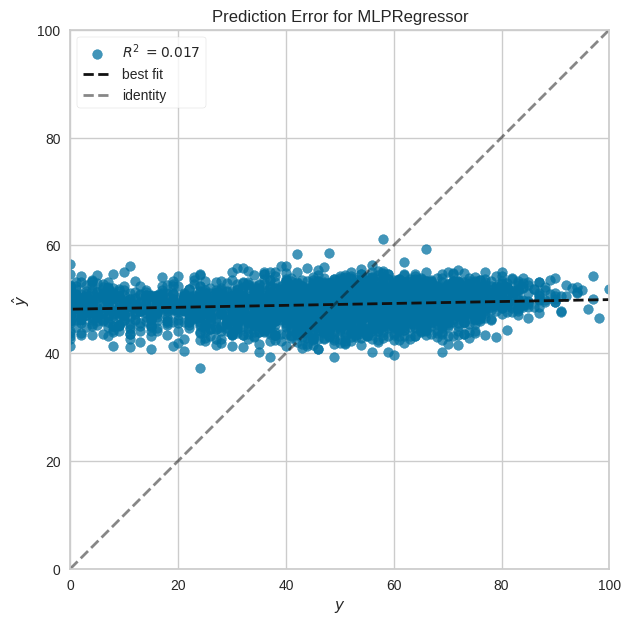

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
# Visualize the prediction error
fig, ax = plt.subplots(figsize=(9, 7))
predError_vis = PredictionError(estimator)
predError_vis.fit(X_train, y_train)  # Fit the training data to the visualizer
predError_vis.score(X_test, y_test)  # Evaluate the model on the test data
predError_vis.show(ax=ax)

* The prediction Error Plot can show us the difference between the true targe value and the predicted target variable. Our r^2=0,017 indicate that the model is  explaining part of the variance in the target variable, however, and since the value is quite far form 1, the perfect prediction, the model is not working as the expectation. 
* In other words, the model is predicting quite poorly the unseen data and is mostly failing in capture and understand the underlying patterns in the data, which make the predction quite distant from the perfect fit. 

Conclusion:
* Based on this, we can say that this model is not reliable and is making poor predictions.

#Evaluation

Based on the success criteria defined on the Business Understanding phase, none of the models used in this regression project performed well in predicting the target variable.

For Model 1, the MLP Regressor, the MAE and RMSE values were relatively high, the R^2 value was close to 0, and the MAPE and MAX Error values were extremely high, indicating poor performance overall.

Model 2, MLPRegressor with Randomized Search, performed similarly on the training and test sets, with relatively low MAE and RMSE values, and low but non-zero R^2 values. However, the extremely high MAPE values suggest that the model may not be performing well on certain data points. Though this is the model that performed better in terms of accuracy, there is still a lot of room for improvement in terms of results.

The Decision Tree Regressor, Model 3, achieved high values for MAPE and MAX Error, indicating poor performance in predicting the target variable. The R^2 value indicated that the model overfits the data.

Model 4, MLP Regression with Optuna hyperparameter optimization, had lower MAE and RMSE values on the training set than the test set, indicating poor performance on new or unseen data. The R^2 value was low, indicating that the model is not explaining a large proportion of the variance in the data.

Overall, it appears that the models need further refinement or improvement to make better predictions. The data mining goals of identifying key features that drive popularity and using this information to guide decision-making were not achieved in this project. It is recommended to revisit the data and the models used to see if any improvements can be made to achieve better performance. Additionally, more data may need to be collected to further train and test the models.